### Regression on a syntetic dataset

Use two type of features: $(1, x, x^2)$ and $(1, x, \sin x)$

The target is noisy: $y = x + 4\sin x + \varepsilon$, $\varepsilon \sim 3\mathcal N(0,1)$

In [1]:
import numpy as np

np.random.seed(190)
l = 50

x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 3*np.random.randn(l)

X_1 = np.vstack([np.ones_like(x), x, x**2]).T
X_2 = np.vstack([np.ones_like(x), x, np.sin(x)]).T

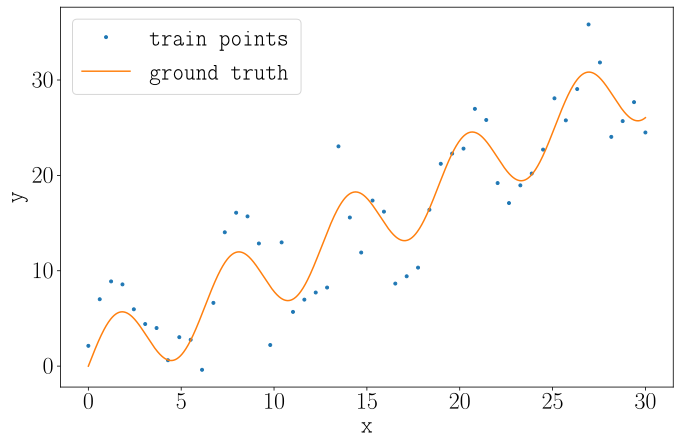

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

font = {'family' : 'monospace',
        'size'   : 24,
        'weight' : 'heavy'
       }

rc('font', **font)

%config InlineBackend.figure_formats = ['svg']

plt.figure(figsize=(11, 7));

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=1000)
plt.plot(x_plot, x_plot + 4*np.sin(x_plot), label='ground truth')

plt.legend(loc='best')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression(fit_intercept=False)
reg_1.fit(X_1, Y)

reg_2 = LinearRegression(fit_intercept=False)
reg_2.fit(X_2, Y)

LinearRegression(fit_intercept=False)

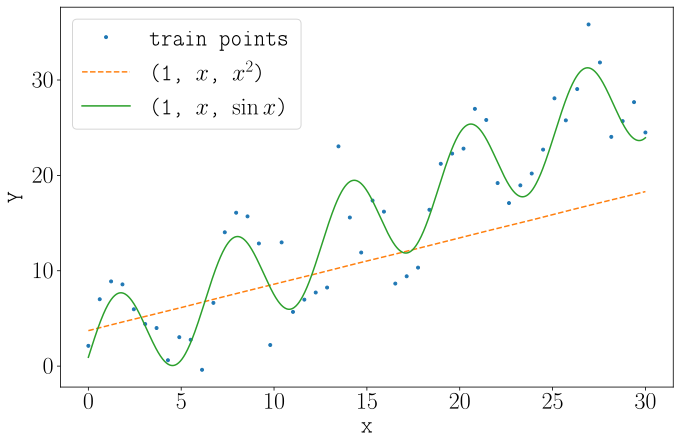

In [12]:
plt.figure(figsize=(11, 7));

plt.xlabel('x')
plt.ylabel('Y')
plt.plot(x, Y, '.', label='train points')

x_plot = np.linspace(0, 30, num=1000)
X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, reg_1.predict(X_plot), label=r'(1, $x$, $x^2$)', linestyle='dashed')
plt.plot(x_plot, reg_2.predict(X_plot), label=r'(1, $x$, $\sin x$)')

plt.legend(loc='best')
plt.show()


## Runge example

In [76]:
def y(x):
    return 1./(1 + 25*x**2)

def plot_runge_train(l):
    plt.figure(figsize=(11, 6))
    xs = np.linspace(-2, 2, num=500)
    plt.plot(xs, y(xs), lw=2, c='r', label=r"$y=\frac 1{1+25x^2}$")
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    plt.scatter(train, y(train), c='b', label="train")
    plt.scatter(test, y(test), c='w', edgecolor='b', linewidth=1.5, label="test")
    plt.title(r"$\ell = {}$".format(l))
    plt.legend()
    plt.grid(ls=':')

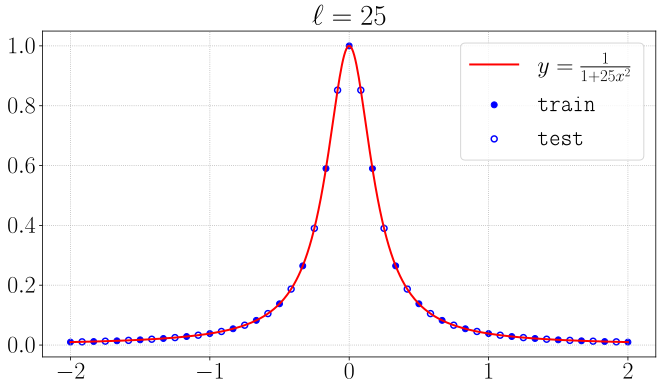

In [78]:
plot_runge_train(25)

In [79]:
from sklearn.linear_model import LinearRegression

def X(x, n):
    res = [np.ones_like(x)]
    for i in range(1, n):
        res.append(x**i)
    return np.vstack(res).T

def poly(coefs):
    result = 0
    for i, coef in coefs:
        result += coef * xs**i
    return resul

def plot_runge_model(l, n):
    plt.figure(figsize=(11, 6))
    xs = np.linspace(-2, 2, num=500)
    plt.plot(xs, y(xs), lw=2, c='r', label=r"$y=\frac 1{1+25x^2}$")
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    plt.scatter(train, y(train), c='b', label="train")
    plt.scatter(test, y(test), c='w', edgecolor='b', linewidth=1.5, label="test")
    
    X_train = X(train, n)
    X_test = X(test, n)
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(X_train, y(X_train))
    ys = lin_reg.predict(X(xs, n))
    plt.plot(xs, ys[:, 1], c='g', lw=2, label=r"$f_\theta(x)$")
    plt.legend()
    plt.title(r"$\ell = {}, n={}$".format(l, n))
    plt.grid(ls=':')

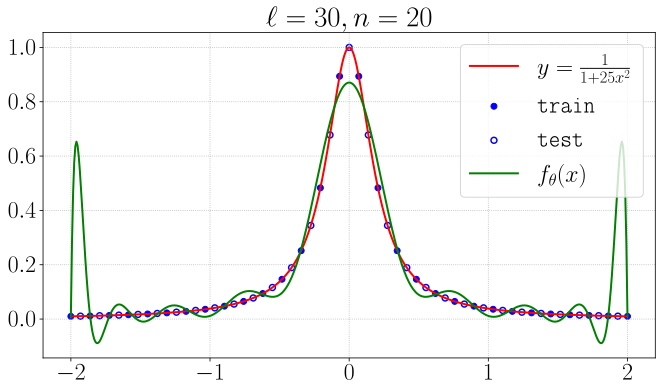

In [80]:
plot_runge_model(30, 20)

In [90]:
def plot_runge_scores(l, ns):
    plt.figure(figsize=(11, 6))
    train = np.linspace(-2, 2, num=l)
    test = train[:-1] + 2 / (l - 1)
    train_score, test_score = [], []
    for n in ns:
        X_train = X(train, n)
        X_test = X(test, n)
        lin_reg = LinearRegression(fit_intercept=False)
        lin_reg.fit(X_train, y(X_train))
        train_score.append(np.mean((lin_reg.predict(X_train) - y(X_train))**2))
        test_score.append(np.mean((lin_reg.predict(X_test) - y(X_test))**2))
        
    plt.semilogy(ns, train_score, c='r', lw=2, label=r"train loss")
    plt.semilogy(ns, test_score, c='b', lw=2, label=r"test loss")
    plt.xlim(ns[0], ns[-1])
    plt.xlabel(r"$n$")
    plt.ylabel(r"$\mathcal L$")
    plt.legend()
    plt.title(r"Scores, $\ell={}$".format(l))
    plt.grid(ls=':')

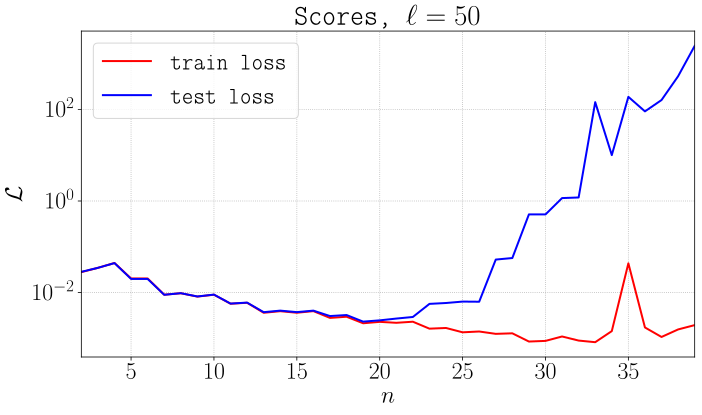

In [91]:
plot_runge_scores(50, np.arange(2, 40))